In [1]:
import pandas as pd

In [2]:
w = pd.read_csv('data/access-log', 
                sep=' ', 
                index_col=False, 
                names=['ip', '1', '2', 'date', 'tz', 'get', 'status', 'bytes'])

In [3]:
w

,ip,1,2,date,tz,get,status,bytes
0,140.180.132.213,-,-,[24/Feb/2008:00:08:59,-0600],GET /ply/ply.html HTTP/1.1,200,97238
1,140.180.132.213,-,-,[24/Feb/2008:00:08:59,-0600],GET /favicon.ico HTTP/1.1,404,133
2,75.54.118.139,-,-,[24/Feb/2008:00:15:40,-0600],GET / HTTP/1.1,200,4447
3,75.54.118.139,-,-,[24/Feb/2008:00:15:41,-0600],GET /images/Davetubes.jpg HTTP/1.1,200,60025
4,75.54.118.139,-,-,[24/Feb/2008:00:15:42,-0600],GET /favicon.ico HTTP/1.1,404,133
...,...,...,...,...,...,...,...,...
7293,80.161.85.77,-,-,[29/Feb/2008:07:47:40,-0600],GET /ply/example.html HTTP/1.1,200,2359
7294,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /ply/ HTTP/1.1,200,8018
7295,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /ply/bookplug.gif HTTP/1.1,200,23903
7296,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /favicon.ico HTTP/1.1,404,133


In [4]:
w['datetime'] = w['date'].str.replace(':', ' ',1).str.replace('[','', regex=False) + ' ' +  w['tz'].str.replace(']','', regex=False)

In [5]:
w

,ip,1,2,date,tz,get,status,bytes,datetime
0,140.180.132.213,-,-,[24/Feb/2008:00:08:59,-0600],GET /ply/ply.html HTTP/1.1,200,97238,24/Feb/2008 00:08:59 -0600
1,140.180.132.213,-,-,[24/Feb/2008:00:08:59,-0600],GET /favicon.ico HTTP/1.1,404,133,24/Feb/2008 00:08:59 -0600
2,75.54.118.139,-,-,[24/Feb/2008:00:15:40,-0600],GET / HTTP/1.1,200,4447,24/Feb/2008 00:15:40 -0600
3,75.54.118.139,-,-,[24/Feb/2008:00:15:41,-0600],GET /images/Davetubes.jpg HTTP/1.1,200,60025,24/Feb/2008 00:15:41 -0600
4,75.54.118.139,-,-,[24/Feb/2008:00:15:42,-0600],GET /favicon.ico HTTP/1.1,404,133,24/Feb/2008 00:15:42 -0600
...,...,...,...,...,...,...,...,...,...
7293,80.161.85.77,-,-,[29/Feb/2008:07:47:40,-0600],GET /ply/example.html HTTP/1.1,200,2359,29/Feb/2008 07:47:40 -0600
7294,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /ply/ HTTP/1.1,200,8018,29/Feb/2008 07:49:28 -0600
7295,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /ply/bookplug.gif HTTP/1.1,200,23903,29/Feb/2008 07:49:28 -0600
7296,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /favicon.ico HTTP/1.1,404,133,29/Feb/2008 07:49:28 -0600


In [6]:
w['dt'] = pd.to_datetime( w['datetime'])

In [7]:
week = w['dt'].dt.dayofweek # день недели

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
wd = w[['ip', 'status']].copy()

In [9]:
wd['weekday'] = week

In [10]:
wd

,ip,status,weekday
0,140.180.132.213,200,6
1,140.180.132.213,404,6
2,75.54.118.139,200,6
3,75.54.118.139,200,6
4,75.54.118.139,404,6
...,...,...,...
7293,80.161.85.77,200,4
7294,156.63.68.202,200,4
7295,156.63.68.202,200,4
7296,156.63.68.202,404,4


In [19]:
wd['bytes'] = pd.to_numeric(w['bytes'].str.replace('-','0'))

In [20]:
wd

,ip,status,weekday,bytes
0,140.180.132.213,200,6,97238
1,140.180.132.213,404,6,133
2,75.54.118.139,200,6,4447
3,75.54.118.139,200,6,60025
4,75.54.118.139,404,6,133
...,...,...,...,...
7293,80.161.85.77,200,4,2359
7294,156.63.68.202,200,4,8018
7295,156.63.68.202,200,4,23903
7296,156.63.68.202,404,4,133


In [12]:
wd.groupby('weekday').sum('bytes')

,status,bytes
weekday,,
0,329290,62507530
1,389679,67520952
2,369903,30690802
3,504989,35088107
4,83084,5118445
6,257000,29815994


In [13]:
wd.groupby('weekday').sum('bytes')

,status,bytes
weekday,,
0,329290,62507530
1,389679,67520952
2,369903,30690802
3,504989,35088107
4,83084,5118445
6,257000,29815994


<AxesSubplot:xlabel='weekday'>

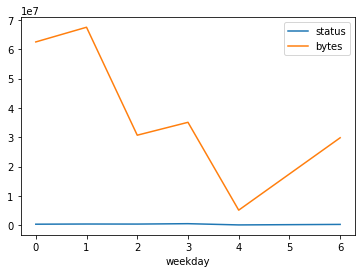

In [14]:
wd.groupby('weekday').sum('bytes').plot()

https://data36.com/plot-histogram-python-pandas/

<AxesSubplot:xlabel='weekday'>

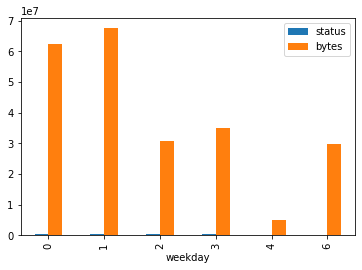

In [15]:
wd.groupby('weekday').sum('bytes').plot.bar()

<AxesSubplot:xlabel='weekday'>

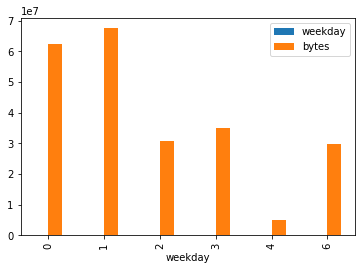

In [21]:
wd.groupby('weekday')[['weekday', 'bytes']].sum('bytes').plot.bar()

<AxesSubplot:xlabel='weekday'>

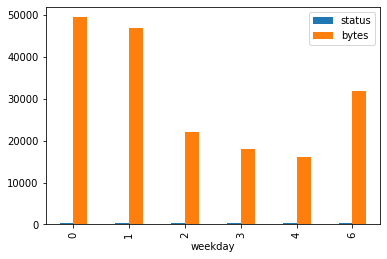

In [16]:
wd.groupby('weekday').mean('bytes').plot.bar()

<AxesSubplot:xlabel='weekday'>

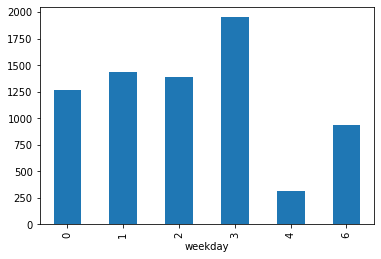

In [17]:
wd.groupby('weekday').count()['ip'].plot.bar()

In [18]:
wd.pivot_table( 
    values="bytes",
    index="weekday",
    columns="status",
    aggfunc="sum",
    margins=True,
)

status,200,206,301,302,304,403,404,All
weekday,,,,,,,,
0,48006736.0,14451458.0,3602.0,1587.0,0.0,257.0,43890.0,62507530
1,62969096.0,4487031.0,3110.0,2796.0,0.0,NaN,58919.0,67520952
2,30093020.0,537635.0,2360.0,2112.0,0.0,214.0,55461.0,30690802
3,33150172.0,1857977.0,10004.0,2784.0,0.0,3596.0,63574.0,35088107
4,4695528.0,409600.0,NaN,2943.0,0.0,NaN,10374.0,5118445
6,28451841.0,1319190.0,944.0,3321.0,0.0,NaN,40698.0,29815994
All,207366393.0,23062891.0,20020.0,15543.0,0.0,4067.0,272916.0,230741830
